In [ ]:
pip install pandas_market_calendars
pip install yfinance 

In [46]:
all_trades = pd.read_excel('congress-trading-all (3).xlsx')

all_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46467 entries, 0 to 46466
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ticker              46466 non-null  object        
 1   TickerType          33530 non-null  object        
 2   Company             46466 non-null  object        
 3   Traded              46467 non-null  datetime64[ns]
 4   Transaction         46467 non-null  object        
 5   Trade_Size_USD      46467 non-null  object        
 6   Status              46377 non-null  object        
 7   Subholding          27395 non-null  object        
 8   Description         4357 non-null   object        
 9   Name                46467 non-null  object        
 10  Filed               46467 non-null  object        
 11  Party               46467 non-null  object        
 12  District            36400 non-null  object        
 13  Chamber             46467 non-null  object    

Data Cleaning 


Get just 2023 trades 

In [47]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
# Convert 'Traded' column to datetime format
all_trades['Traded'] = pd.to_datetime(all_trades['Traded'])

# Filter rows for the year 2023
trades_2023 = all_trades[(all_trades['Traded'] >= '2023-01-01') & (all_trades['Traded'] < '2024-01-01')]


trades_2023.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,2024-01-13,R,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15
440,TFC,Stock,Truist Financial Corp,2023-12-29,Sale (Partial),"$15,001 - $50,000",New,NaN,NaN,"Capito, Shelley Moore",2024-01-12,R,NaN,Senate,NaN,2024-01-12,-13.182654,West Virginia,2024-01-12
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,2024-01-07,D,NJ05,House,NaN,2024-01-09,-8.967998,New Jersey,2024-01-09
442,SCHW,ST,CHARLES SCHWAB CORPORATION,2023-12-29,Sale,"$50,001 - $100,000",NEW,HILL 2012 TRUST (FORMERLY JAY F HILL TRUST),NaN,James French Hill,2024-01-10,R,AR02,House,NaN,2024-01-11,-10.161162,Arkansas,2024-01-11
443,PYPL,ST,"PAYPAL HOLDINGS, INC.",2023-12-29,Sale,"$15,001 - $50,000",NEW,HILL 2012 TRUST (FORMERLY JAY F HILL TRUST),NaN,James French Hill,2024-01-10,R,AR02,House,NaN,2024-01-11,-5.258127,Arkansas,2024-01-11


Get just purchases 

In [48]:
purchases_2023 = trades_2023[(trades_2023['Transaction'] == 'Purchase') | (trades_2023['Transaction'] == 'Purchase (Partial)')]

purchases_2023.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,2024-01-13,R,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,2024-01-07,D,NJ05,House,NaN,2024-01-09,-8.967998,New Jersey,2024-01-09
444,LMT,ST,LOCKHEED MARTIN CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,2024-01-13,R,OK01,House,NaN,2024-01-15,-11.446460,Oklahoma,2024-01-15
446,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,2024-01-13,R,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15
451,ROP,ST,"ROPER TECHNOLOGIES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,2024-01-22,D,FL23,House,NaN,2024-01-23,-7.095850,Florida,2024-01-23


ADD short term date column


In [49]:

import pandas_market_calendars as mcal


def add_short_term_trade_date(df):
    """
    Add a 'Short term trade' column to the DataFrame with dates two weeks 
    after the 'Traded' date, adjusted for weekends and holidays.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Traded' column
    
    Returns:
    DataFrame: Original DataFrame with added 'Short term trade' column
    """
    # Ensure 'Traded' is in datetime format
    df['Traded'] = pd.to_datetime(df['Traded'])

    # Get NYSE calendar
    nyse = mcal.get_calendar('NYSE')

    def get_next_trading_day(date):
        one_month_later = date + timedelta(days=30)
        valid_days = nyse.valid_days(start_date=one_month_later, end_date=one_month_later + timedelta(days=5))
        return valid_days[0]

    # Calculate the date two weeks later and adjust for weekends and holidays
    df['Short term Time'] = df['Traded'].apply(get_next_trading_day)
    
    return df

# Apply the function to purchases_2023
purchases_2023 = add_short_term_trade_date(purchases_2023)

# Display the first few rows to verify
print(purchases_2023[['Traded', 'Short term Time']].info())

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\3812822894.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Index: 1606 entries, 439 to 4664
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Traded           1606 non-null   datetime64[ns]     
 1   Short term Time  1606 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1)
memory usage: 37.6 KB
None


C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\3812822894.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
# Convert 'Short term trade' to string if it's not already
purchases_2023['Short term Time'] = purchases_2023['Short term Time'].astype(str)

# Remove everything after the first space (which removes time and timezone info)
purchases_2023['Short term Time'] = purchases_2023['Short term Time'].str.split().str[0]

# Display the first few rows to verify
print(purchases_2023[['Traded', 'Short term Time']].head())

# Optionally, convert back to datetime if needed
purchases_2023['Short term Time'] = pd.to_datetime(purchases_2023['Short term Time'])

        Traded Short term Time
439 2023-12-29      2024-01-29
441 2023-12-29      2024-01-29
444 2023-12-29      2024-01-29
446 2023-12-29      2024-01-29
451 2023-12-28      2024-01-29


C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\2011420738.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\2011420738.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\2011420738.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Mid term trade Date


In [51]:

import pandas_market_calendars as mcal


def add_mid_term_trade_date(df):
    """
    Add a 'Short term trade' column to the DataFrame with dates two weeks 
    after the 'Traded' date, adjusted for weekends and holidays.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Traded' column
    
    Returns:
    DataFrame: Original DataFrame with added 'Short term trade' column
    """
    # Ensure 'Traded' is in datetime format
    df['Traded'] = pd.to_datetime(df['Traded'])

    # Get NYSE calendar
    nyse = mcal.get_calendar('NYSE')

    def get_next_trading_day(date):
        six_month_later = date + timedelta(days=183)
        valid_days = nyse.valid_days(start_date=six_month_later, end_date=six_month_later + timedelta(days=5))
        return valid_days[0]

    # Calculate the date two weeks later and adjust for weekends and holidays
    df['Mid term Time'] = df['Traded'].apply(get_next_trading_day)
    
    return df

# Apply the function to purchases_2023
purchases_2023 = add_mid_term_trade_date(purchases_2023)

# Display the first few rows to verify
print(purchases_2023[['Traded', 'Mid term Time']].head())

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\3714852903.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



        Traded             Mid term Time
439 2023-12-29 2024-07-01 00:00:00+00:00
441 2023-12-29 2024-07-01 00:00:00+00:00
444 2023-12-29 2024-07-01 00:00:00+00:00
446 2023-12-29 2024-07-01 00:00:00+00:00
451 2023-12-28 2024-06-28 00:00:00+00:00


C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\3714852903.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
# Convert 'Short term trade' to string if it's not already
purchases_2023['Mid term Time'] = purchases_2023['Mid term Time'].astype(str)

# Remove everything after the first space (which removes time and timezone info)
purchases_2023['Mid term Time'] = purchases_2023['Mid term Time'].str.split().str[0]

# Display the first few rows to verify
print(purchases_2023[['Traded', 'Mid term Time']].head())

# Optionally, convert back to datetime if needed
purchases_2023['Mid term Time'] = pd.to_datetime(purchases_2023['Mid term Time'])

        Traded Mid term Time
439 2023-12-29    2024-07-01
441 2023-12-29    2024-07-01
444 2023-12-29    2024-07-01
446 2023-12-29    2024-07-01
451 2023-12-28    2024-06-28


C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\1026543605.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\1026543605.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\1026543605.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Create Long term Trade date column 


In [53]:
one_year_trades = purchases_2023[purchases_2023['Traded'] < '2024-07-01']

one_year_trades.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,...,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified,Short term Time,Mid term Time
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,...,R,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,D,NJ05,House,NaN,2024-01-09,-8.967998,New Jersey,2024-01-09,2024-01-29,2024-07-01
444,LMT,ST,LOCKHEED MARTIN CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,R,OK01,House,NaN,2024-01-15,-11.446460,Oklahoma,2024-01-15,2024-01-29,2024-07-01
446,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,R,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01
451,ROP,ST,"ROPER TECHNOLOGIES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,D,FL23,House,NaN,2024-01-23,-7.095850,Florida,2024-01-23,2024-01-29,2024-06-28


In [54]:
import pandas_market_calendars as mcal


def add_long_trade_date(df):
    """
    Add a 'Short term trade' column to the DataFrame with dates two weeks 
    after the 'Traded' date, adjusted for weekends and holidays.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Traded' column
    
    Returns:
    DataFrame: Original DataFrame with added 'Short term trade' column
    """
    # Ensure 'Traded' is in datetime format
    df['Traded'] = pd.to_datetime(df['Traded'])
    
    # Get NYSE calendar
    nyse = mcal.get_calendar('NYSE')

    def get_next_trading_day(date):
        year_later = date + timedelta(days=365)
        valid_days = nyse.valid_days(start_date=year_later, end_date=year_later + timedelta(days=5))
        return valid_days[0]

    # Calculate the date two weeks later and adjust for weekends and holidays
    df['Long Term date'] = df['Traded'].apply(get_next_trading_day)
    
    return df

# Apply the function to purchases_2023
one_year_trades = add_long_trade_date(one_year_trades)

# Display the first few rows to verify
one_year_trades.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,...,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified,Short term Time,Mid term Time,Long Term date
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,...,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30 00:00:00+00:00
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,NJ05,House,NaN,2024-01-09,-8.967998,New Jersey,2024-01-09,2024-01-29,2024-07-01,2024-12-30 00:00:00+00:00
444,LMT,ST,LOCKHEED MARTIN CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,OK01,House,NaN,2024-01-15,-11.446460,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30 00:00:00+00:00
446,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30 00:00:00+00:00
451,ROP,ST,"ROPER TECHNOLOGIES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,FL23,House,NaN,2024-01-23,-7.095850,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27 00:00:00+00:00


In [55]:
# Convert 'Short term trade' to string if it's not already
one_year_trades['Long Term date'] = one_year_trades['Long Term date'].astype(str)

# Remove everything after the first space (which removes time and timezone info)
one_year_trades['Long Term date'] = one_year_trades['Long Term date'].str.split().str[0]

# Display the first few rows to verify
print(one_year_trades[['Traded', 'Long Term date']].head())

# Optionally, convert back to datetime if needed
one_year_trades['Long Term date'] = pd.to_datetime(one_year_trades['Long Term date'])

#apend to purchases 2023
purchases_2023 = pd.concat([purchases_2023, one_year_trades['Long Term date']], axis=1)

purchases_2023.head()

        Traded Long Term date
439 2023-12-29     2024-12-30
441 2023-12-29     2024-12-30
444 2023-12-29     2024-12-30
446 2023-12-29     2024-12-30
451 2023-12-28     2024-12-27


,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,...,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified,Short term Time,Mid term Time,Long Term date
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,...,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,NJ05,House,NaN,2024-01-09,-8.967998,New Jersey,2024-01-09,2024-01-29,2024-07-01,2024-12-30
444,LMT,ST,LOCKHEED MARTIN CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,OK01,House,NaN,2024-01-15,-11.446460,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30
446,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30
451,ROP,ST,"ROPER TECHNOLOGIES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,FL23,House,NaN,2024-01-23,-7.095850,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27


Adding in returns and culative returns to stock prices collect from yfinance

In [56]:
Stock_prices_for_2023 = pd.read_csv('C:/Users/Sdean/PycharmProjects/CONGRESStrading/Stock Data/stock_prices_2023_to_now.csv')

Stock_prices_for_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187126 entries, 0 to 187125
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    187126 non-null  object 
 1   Ticker  187126 non-null  object 
 2   Close   187126 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.3+ MB


In [57]:
import pandas as pd

# Assuming your dataframe is called Stock_prices_for_2023

# First, let's ensure the Date column is in datetime format
Stock_prices_for_2023['Date'] = pd.to_datetime(Stock_prices_for_2023['Date'])

# Sort the dataframe by Ticker and Date
Stock_prices_for_2023 = Stock_prices_for_2023.sort_values(['Ticker', 'Date'])

# Group by Ticker and calculate the percentage change for each group
Stock_prices_for_2023['Daily_Return'] = Stock_prices_for_2023.groupby('Ticker')['Close'].pct_change()

# Convert to percentage and round to 2 decimal places
Stock_prices_for_2023['Daily_Return_Percentage'] = (Stock_prices_for_2023['Daily_Return'] * 100).round(2)
# The first row for each ticker will have NaN as its daily return, we can fill these with 0
# Stock_prices_for_2023['Daily_Return'] = Stock_prices_for_2023['Daily_Return'].fillna(0)

# Display the first few rows to verify
print(Stock_prices_for_2023.head(10))

# Get some statistics about the new Daily_Return column
print(Stock_prices_for_2023['Daily_Return'].describe())

           Date Ticker      Close  Daily_Return  Daily_Return_Percentage
0    2023-01-03  AAGIY  45.799999           NaN                      NaN
484  2023-01-04  AAGIY  47.820000      0.044105                     4.41
968  2023-01-05  AAGIY  45.970001     -0.038687                    -3.87
1452 2023-01-06  AAGIY  46.130001      0.003481                     0.35
1936 2023-01-09  AAGIY  44.889999     -0.026881                    -2.69
2420 2023-01-10  AAGIY  44.570000     -0.007129                    -0.71
2904 2023-01-11  AAGIY  44.410000     -0.003590                    -0.36
3388 2023-01-12  AAGIY  45.759998      0.030399                     3.04
3872 2023-01-13  AAGIY  45.259998     -0.010927                    -1.09
4356 2023-01-17  AAGIY  44.070000     -0.026293                    -2.63
count    186641.000000
mean          0.000702
std           0.027518
min          -0.998143
25%          -0.009298
50%           0.000576
75%           0.010245
max           4.483871
Name: Daily_R

In [58]:
# Calculate cumulative returns
Stock_prices_for_2023['Cumulative_Return'] = Stock_prices_for_2023.groupby('Ticker').apply(lambda x: (1 + x['Daily_Return']).cumprod() - 1).reset_index(level=0, drop=True)

Stock_prices_for_2023['Cumulative_Return'] = (Stock_prices_for_2023['Cumulative_Return'] * 100).round(2)
    
 
    
    

In [59]:
Stock_prices_for_2023.head(100)  

,Date,Ticker,Close,Daily_Return,Daily_Return_Percentage,Cumulative_Return
0,2023-01-03,AAGIY,45.799999,NaN,NaN,NaN
484,2023-01-04,AAGIY,47.820000,0.044105,4.41,4.41
968,2023-01-05,AAGIY,45.970001,-0.038687,-3.87,0.37
1452,2023-01-06,AAGIY,46.130001,0.003481,0.35,0.72
1936,2023-01-09,AAGIY,44.889999,-0.026881,-2.69,-1.99
...,...,...,...,...,...,...
45991,2023-05-19,AAGIY,40.540001,0.006955,0.70,-11.48
46476,2023-05-22,AAGIY,40.549999,0.000247,0.02,-11.46
46961,2023-05-23,AAGIY,39.610001,-0.023181,-2.32,-13.52
47446,2023-05-24,AAGIY,38.939999,-0.016915,-1.69,-14.98


More Data cleaning : Adding Theoritical exit dates for trades 


In [60]:
import pandas as pd

def get_total_return(ticker, date):
    """
    Get the cumulative return for a specific ticker and date.
    
    Parameters:
    ticker (str): The stock ticker symbol
    date (str): The date in 'YYYY-MM-DD' format
    
    Returns:
    float: The cumulative return for the specified ticker and date
    None: If no data is available for the given ticker and date
    """
    # Ensure the date is in datetime format
    date = pd.to_datetime(date)
    
    # Filter the dataframe for the specific ticker and date
    result = Stock_prices_for_2023[(Stock_prices_for_2023['Ticker'] == ticker) & 
                                   (Stock_prices_for_2023['Date'] == date)]
    
    # Check if we have a result
    if not result.empty:
        # Return the cumulative return
        return result['Close'].iloc[0]
    else:
        # Return None if no data is found
        return None

# Example usage:
total_return = get_total_return('AAPL', '2023-06-30')
print(f"Stock price: {total_return}")

Stock price: 193.97000122070312


Adding in closing prices for trade dates 

In [62]:
purchases_2023['Entry_close'] = purchases_2023.apply(lambda x: get_total_return(x['Ticker'], x['Traded']), axis=1)

purchases_2023['Short_term_close'] = purchases_2023.apply(lambda x: get_total_return(x['Ticker'], x['Short term Time']), axis=1)

purchases_2023['Mid_term_close'] = purchases_2023.apply(lambda x: get_total_return(x['Ticker'], x['Mid term Time']), axis=1)

purchases_2023['Long_term_close'] = purchases_2023.apply(lambda x: get_total_return(x['Ticker'], x['Long Term date']), axis=1)

In [64]:
purchases_2023.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,...,excess_return,State,last_modified,Short term Time,Mid term Time,Long Term date,Short_term_close,Entry_close,Mid_term_close,Long_term_close
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,...,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30,42.770000,45.299999,47.730000,NaN
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,-8.967998,New Jersey,2024-01-09,2024-01-29,2024-07-01,2024-12-30,438.309998,468.140015,435.000000,NaN
444,LMT,ST,LOCKHEED MARTIN CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,-11.446460,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30,428.010010,453.239990,466.440002,NaN
446,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,-2.481609,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30,42.770000,45.299999,47.730000,NaN
451,ROP,ST,"ROPER TECHNOLOGIES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,-7.095850,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27,555.929993,546.150024,563.659973,NaN


Since some trades did not have a full year time yet we got NaN values will replace with stop date of what I have now for the stock. 

In [65]:
import pandas as pd
import numpy as np

# First, let's define a function to get the close price for a specific date
def get_close_price_2024_06_28(ticker):
    return get_total_return(ticker, '2024-06-28')

# Now, let's apply this function to fill NaN values
purchases_2023['Long term close'] = purchases_2023.apply(
    lambda row: get_close_price_2024_06_28(row['Ticker']) 
    if pd.isna(row['Long_term_close']) 
    else row['Long_term_close'],
    axis=1
)





In [66]:
# Print the first few rows to verify
purchases_2023.head(10)



,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,...,State,last_modified,Short term Time,Mid term Time,Long Term date,Short_term_close,Entry_close,Mid_term_close,Long_term_close,Long term close
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,...,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30,42.770000,45.299999,47.730000,NaN,47.400002
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,New Jersey,2024-01-09,2024-01-29,2024-07-01,2024-12-30,438.309998,468.140015,435.000000,NaN,435.950012
444,LMT,ST,LOCKHEED MARTIN CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30,428.010010,453.239990,466.440002,NaN,467.100006
446,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,Oklahoma,2024-01-15,2024-01-29,2024-07-01,2024-12-30,42.770000,45.299999,47.730000,NaN,47.400002
451,ROP,ST,"ROPER TECHNOLOGIES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27,555.929993,546.150024,563.659973,NaN,563.659973
452,META,ST,"META PLATFORMS, INC. - CLASS A",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27,401.019989,358.320007,504.220001,NaN,504.220001
454,LLY,ST,ELI LILLY AND COMPANY,2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27,645.000000,580.849976,905.380005,NaN,905.380005
456,TMUS,ST,"T-MOBILE US, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27,163.089996,158.949997,176.179993,NaN,176.179993
457,WST,ST,"WEST PHARMACEUTICAL SERVICES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (6),NaN,Jared Moskowitz,...,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27,370.500000,354.929993,329.390015,NaN,329.390015
459,GOOG,ST,ALPHABET INC. - CLASS C CAPITAL STOCK,2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (6),NaN,Jared Moskowitz,...,Florida,2024-01-23,2024-01-29,2024-06-28,2024-12-27,154.839996,141.279999,183.419998,NaN,183.419998


Calculate Profit or loss 

In [67]:
purchases_2023['Short_term_profit_loss'] = (purchases_2023['Short_term_close'] - purchases_2023['Entry_close']) / purchases_2023['Entry_close']

purchases_2023['Mid_term_profit_loss'] = (purchases_2023['Mid_term_close'] - purchases_2023['Entry_close']) / purchases_2023['Entry_close']

purchases_2023['Long_term_profit_loss'] = (purchases_2023['Long term close'] - purchases_2023['Entry_close']) / purchases_2023['Entry_close']

purchases_2023.head(10)

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,...,Mid term Time,Long Term date,Short_term_close,Entry_close,Mid_term_close,Long_term_close,Long term close,Short_term_profit_loss,Mid_term_profit_loss,Long_term_profit_loss
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,...,2024-07-01,2024-12-30,42.770000,45.299999,47.730000,NaN,47.400002,-0.055850,0.053642,0.046358
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,2024-07-01,2024-12-30,438.309998,468.140015,435.000000,NaN,435.950012,-0.063720,-0.070791,-0.068761
444,LMT,ST,LOCKHEED MARTIN CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,2024-07-01,2024-12-30,428.010010,453.239990,466.440002,NaN,467.100006,-0.055666,0.029124,0.030580
446,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,...,2024-07-01,2024-12-30,42.770000,45.299999,47.730000,NaN,47.400002,-0.055850,0.053642,0.046358
451,ROP,ST,"ROPER TECHNOLOGIES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,2024-06-28,2024-12-27,555.929993,546.150024,563.659973,NaN,563.659973,0.017907,0.032061,0.032061
452,META,ST,"META PLATFORMS, INC. - CLASS A",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,2024-06-28,2024-12-27,401.019989,358.320007,504.220001,NaN,504.220001,0.119167,0.407178,0.407178
454,LLY,ST,ELI LILLY AND COMPANY,2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,2024-06-28,2024-12-27,645.000000,580.849976,905.380005,NaN,905.380005,0.110442,0.558716,0.558716
456,TMUS,ST,"T-MOBILE US, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (5),NaN,Jared Moskowitz,...,2024-06-28,2024-12-27,163.089996,158.949997,176.179993,NaN,176.179993,0.026046,0.108399,0.108399
457,WST,ST,"WEST PHARMACEUTICAL SERVICES, INC.",2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (6),NaN,Jared Moskowitz,...,2024-06-28,2024-12-27,370.500000,354.929993,329.390015,NaN,329.390015,0.043868,-0.071958,-0.071958
459,GOOG,ST,ALPHABET INC. - CLASS C CAPITAL STOCK,2023-12-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ACTIVE ASSETS (6),NaN,Jared Moskowitz,...,2024-06-28,2024-12-27,154.839996,141.279999,183.419998,NaN,183.419998,0.095980,0.298273,0.298273


In [68]:
purchases_2023 = purchases_2023.drop('Long_term_close', axis=1)


purchases_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1606 entries, 439 to 4664
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Ticker                  1606 non-null   object        
 1   TickerType              1605 non-null   object        
 2   Company                 1606 non-null   object        
 3   Traded                  1606 non-null   datetime64[ns]
 4   Transaction             1606 non-null   object        
 5   Trade_Size_USD          1606 non-null   object        
 6   Status                  1597 non-null   object        
 7   Subholding              999 non-null    object        
 8   Description             229 non-null    object        
 9   Name                    1606 non-null   object        
 10  Filed                   1606 non-null   object        
 11  Party                   1606 non-null   object        
 12  District                1246 non-null   object     

Filter to make sure we just have Stocks purchased and drop and values that are missing trading information

In [69]:
Just_stocks_purchases_2023 = purchases_2023[(purchases_2023['TickerType'] == 'ST') | (purchases_2023['TickerType'] == 'Stock')]

Just_stocks_purchases_2023VE = Just_stocks_purchases_2023.dropna(subset=['Entry_close'])

Just_stocks_purchases_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 439 to 4657
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Ticker                  1488 non-null   object        
 1   TickerType              1488 non-null   object        
 2   Company                 1488 non-null   object        
 3   Traded                  1488 non-null   datetime64[ns]
 4   Transaction             1488 non-null   object        
 5   Trade_Size_USD          1488 non-null   object        
 6   Status                  1479 non-null   object        
 7   Subholding              927 non-null    object        
 8   Description             157 non-null    object        
 9   Name                    1488 non-null   object        
 10  Filed                   1488 non-null   object        
 11  Party                   1488 non-null   object        
 12  District                1173 non-null   object     

Run Basic Statistics to find if Short term or Long term is more advantagous. 

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\786936118.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\786936118.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sdean\AppData\Local\Temp\ipykernel_25128\786936118.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

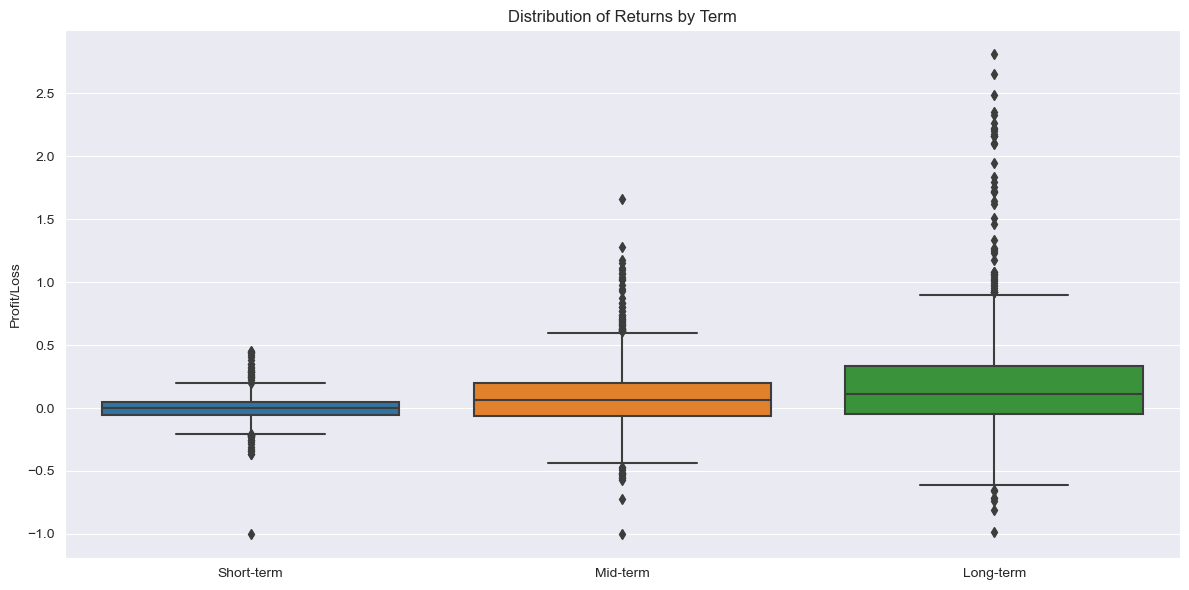


Summary Statistics:
       Short_term_profit_loss  Mid_term_profit_loss  Long_term_profit_loss  \
count             1328.000000           1328.000000            1328.000000   
mean                -0.002267              0.087364               0.178954   
std                  0.095362              0.245592               0.404741   
min                 -0.998569             -0.999639              -0.981513   
25%                 -0.054690             -0.061280              -0.048053   
50%                 -0.000390              0.062338               0.107550   
75%                  0.046509              0.201109               0.330405   
max                  0.451389              1.659121               2.808828   

       Short_term_days  Mid_term_days  Long_term_days  
count      1328.000000    1328.000000     1328.000000  
mean         30.431476     183.386295      365.386295  
std           0.759647       0.827572        0.821174  
min          30.000000     183.000000      365.00000

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming your dataframe is named Just_stocks_purchases_2023VE

# Calculate the time differences in days
Just_stocks_purchases_2023VE['Short_term_days'] = (Just_stocks_purchases_2023VE['Short term Time'] - Just_stocks_purchases_2023VE['Traded']).dt.days
Just_stocks_purchases_2023VE['Mid_term_days'] = (Just_stocks_purchases_2023VE['Mid term Time'] - Just_stocks_purchases_2023VE['Traded']).dt.days
Just_stocks_purchases_2023VE['Long_term_days'] = (Just_stocks_purchases_2023VE['Long Term date'] - Just_stocks_purchases_2023VE['Traded']).dt.days


# Compare distributions of returns for different terms
plt.figure(figsize=(12, 6))
sns.boxplot(data=Just_stocks_purchases_2023VE[['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss']])
plt.title('Distribution of Returns by Term')
plt.ylabel('Profit/Loss')
plt.xticks(range(3), ['Short-term', 'Mid-term', 'Long-term'])
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(Just_stocks_purchases_2023VE[['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss', 
                                    'Short_term_days', 'Mid_term_days', 'Long_term_days']].describe())

Clear indication that there is a relationships to with better preformance the longer you hold Congressmen pick stocks long term. 

Lets see what party traded the best :3

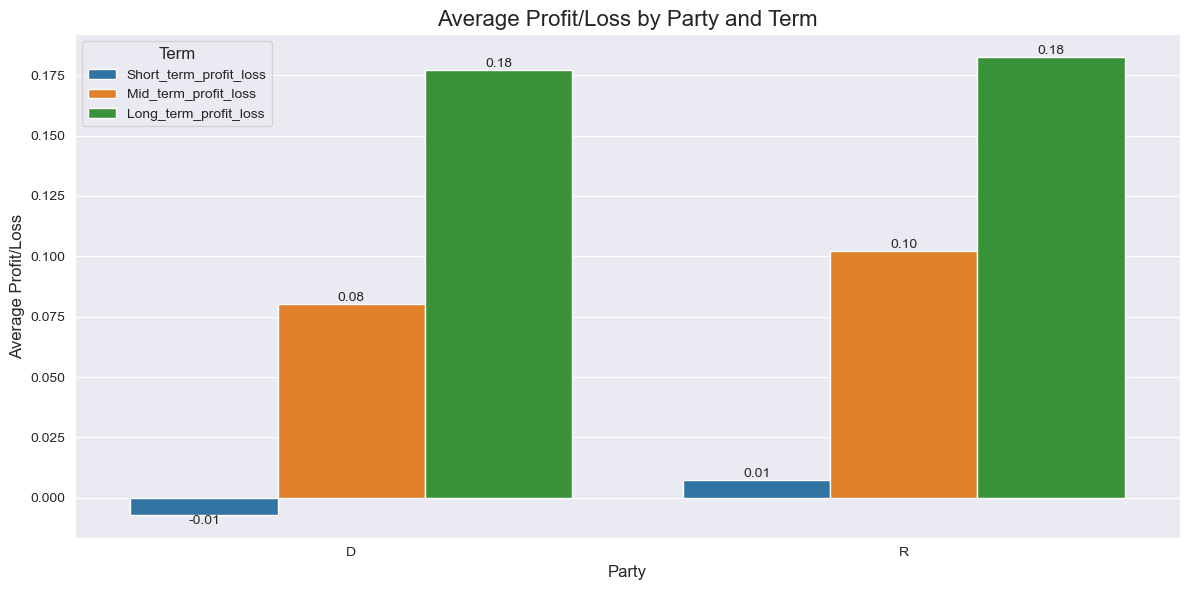

       Short_term_profit_loss  Mid_term_profit_loss  Long_term_profit_loss
Party                                                                     
D                   -0.007028              0.080144               0.177259
R                    0.007407              0.102034               0.182400


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named Just_stocks_purchases_2023VE

# Calculate mean profit/loss for each party and term
profit_loss_by_party = Just_stocks_purchases_2023VE.groupby('Party')[['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss']].mean()

# Reshape the data for plotting
profit_loss_melted = profit_loss_by_party.reset_index().melt(id_vars=['Party'], 
                                                             var_name='Term', 
                                                             value_name='Profit_Loss')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Party', y='Profit_Loss', hue='Term', data=profit_loss_melted)

# Customize the plot
plt.title('Average Profit/Loss by Party and Term', fontsize=16)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Average Profit/Loss', fontsize=12)
plt.xticks()
plt.legend(title='Term', title_fontsize='12', fontsize='10')

# Add value labels on the bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f', label_type='edge')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the exact values
print(profit_loss_by_party)

Republicans were the most Long term profitable. the S & P returned 26.29%  in 2023. No Alpha would be extracted from trading buys of a particular party. 

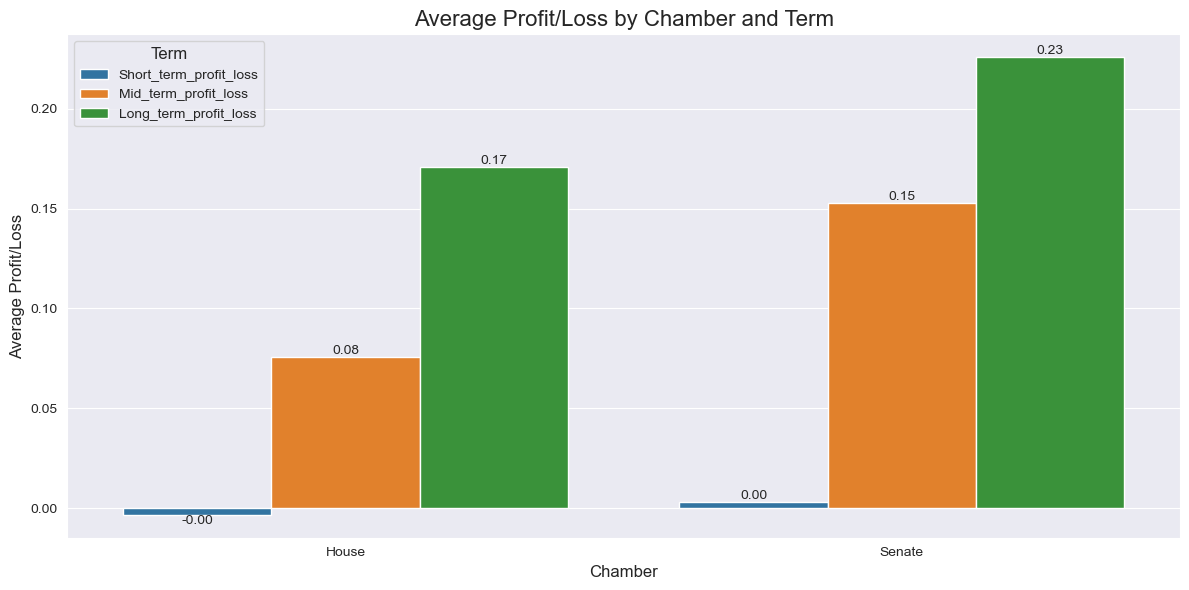

         Short_term_profit_loss  Mid_term_profit_loss  Long_term_profit_loss
Chamber                                                                     
House                 -0.003247              0.075893               0.170770
Senate                 0.003325              0.152832               0.225662


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean profit/loss for each chamber and term
profit_loss_by_Chamber = Just_stocks_purchases_2023VE.groupby('Chamber')[['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss']].mean()

# Reset the index to make 'Chamber' a column again
profit_loss_by_Chamber_reset = profit_loss_by_Chamber.reset_index()

# Reshape the data for plotting
profit_loss_melted = pd.melt(profit_loss_by_Chamber_reset, 
                             id_vars=['Chamber'], 
                             value_vars=['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss'],
                             var_name='Term', 
                             value_name='Profit_Loss')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Chamber', y='Profit_Loss', hue='Term', data=profit_loss_melted)

# Customize the plot
plt.title('Average Profit/Loss by Chamber and Term', fontsize=16)
plt.xlabel('Chamber', fontsize=12)
plt.ylabel('Average Profit/Loss', fontsize=12)
plt.legend(title='Term', title_fontsize='12', fontsize='10')

# Add value labels on the bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f', label_type='edge')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the exact values
print(profit_loss_by_Chamber)

Would not beat benchmark standards if buying and holding by different chambers. 


In [74]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Assuming your dataframe is named Just_stocks_purchases_2023VE

# Calculate mean profit/loss for each person and term
profit_loss_by_name = Just_stocks_purchases_2023VE.groupby('Name')[['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss']].mean()

# Calculate overall performance (sum of all terms)
profit_loss_by_name['Overall'] = profit_loss_by_name.sum(axis=1)

# Get top 10 and bottom 10 performers
top_10 = profit_loss_by_name.nlargest(10, 'Overall')
bottom_10 = profit_loss_by_name.nsmallest(10, 'Overall')

# Combine top and bottom performers
selected_members = pd.concat([top_10, bottom_10])

# Create the plot
fig = go.Figure()

# Add a line for each selected Congress member
for name in selected_members.index:
    fig.add_trace(go.Scatter(
        x=['Entry', 'Short term', 'Mid term', 'Long term'],
        y=[0] + selected_members.loc[name, ['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss']].tolist(),
        mode='lines+markers',
        name=name,
        hoverinfo='name+y',
        line=dict(shape='spline', smoothing=1.3),  # This creates the smoothed curve
        showlegend=False
    ))

# Customize the plot
fig.update_layout(
    title='Profit/Loss by Top and Bottom 10 Congress Members',
    xaxis_title='Term',
    yaxis_title='Average Profit/Loss',
    hovermode='closest',
    width=1200,
    height=800
)

# Add a horizontal line at y=0 to show the breakeven point
fig.add_shape(
    type="line",
    x0="Entry",
    y0=0,
    x1="Long term",
    y1=0,
    line=dict(color="red", width=2, dash="dash"),
)

# Update y-axis to be symmetric around 0
max_abs_y = max(abs(selected_members.values.min()), abs(selected_members.values.max()))
fig.update_yaxes(range=[-max_abs_y*1.1, max_abs_y*1.1])

# Show the plot
fig.show()

# Print the top 5 most profitable and least profitable members for each term
terms = ['Short_term_profit_loss', 'Mid_term_profit_loss', 'Long_term_profit_loss']
for term in terms:
    print(f"\nTop 5 most profitable members ({term}):")
    print(profit_loss_by_name[term].nlargest(5))
    print(f"\nTop 5 least profitable members ({term}):")
    print(profit_loss_by_name[term].nsmallest(5))


Top 5 most profitable members (Short_term_profit_loss):
Name
Smith, Tina             0.323582
Mark Dr Green           0.146473
Sullivan, Dan           0.121238
Dwight Evans            0.064725
Maria Elvira Salazar    0.053107
Name: Short_term_profit_loss, dtype: float64

Top 5 least profitable members (Short_term_profit_loss):
Name
Greg Steube           -0.226299
Richard W. Allen      -0.093459
Michael K. Simpson    -0.056785
Whitehouse, Sheldon   -0.048311
Jonathan Jackson      -0.034728
Name: Short_term_profit_loss, dtype: float64

Top 5 most profitable members (Mid_term_profit_loss):
Name
Smith, Tina        0.702723
Morgan Mcgarvey    0.592931
Pete Sessions      0.481820
Dwight Evans       0.390694
Sullivan, Dan      0.374565
Name: Mid_term_profit_loss, dtype: float64

Top 5 least profitable members (Mid_term_profit_loss):
Name
James E Hon Banks    -0.316486
Greg Steube          -0.253613
Robert E. Latta      -0.122768
Peters, Gary         -0.083032
Michael K. Simpson   -0.062916
N

In [75]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have these dataframes:
# Just_stocks_purchases_2023VE
# Stock_prices_for_2023

# List of top congressmen
top_congressmen = ["Morgan Mcgarvey", "Smith, Tina", "Pete Sessions", "Mark Dr Green"]

# Function to plot congressman trades
def plot_congressman_trades(congressman):
    # Get trades for this congressman
    trades = Just_stocks_purchases_2023VE[Just_stocks_purchases_2023VE['Name'] == congressman]
    
    # Create a figure
    fig = go.Figure()
    
    # Plot cumulative returns for each ticker
    for _, trade in trades.iterrows():
        ticker = trade['Ticker']
        entry_date = trade['Traded']
        
        # Get cumulative returns for this ticker
        ticker_data = Stock_prices_for_2023[Stock_prices_for_2023['Ticker'] == ticker]
        ticker_data = ticker_data.sort_values('Date')
        
        # Plot cumulative returns
        fig.add_trace(go.Scatter(
            x=ticker_data['Date'],
            y=ticker_data['Cumulative_Return'],
            mode='lines',
            name=ticker,
            hovertemplate='<b>%{text}</b><br>' +
                          'Date: %{x}<br>' +
                          'Cumulative Return: %{y:.2f}<extra></extra>',
            text=[ticker] * len(ticker_data),
            showlegend=False
        ))
        
        # Mark entry point
        entry_return = ticker_data[ticker_data['Date'] == entry_date]['Cumulative_Return'].values
        if len(entry_return) > 0:
            fig.add_trace(go.Scatter(
                x=[entry_date],
                y=[entry_return[0]],
                mode='markers',
                marker=dict(color='red', size=10),
                name=f'{ticker} Entry',
                hovertemplate='<b>%{text}</b><br>' +
                              'Entry Date: %{x}<br>' +
                              'Entry Return: %{y:.2f}<extra></extra>',
                text=[f'{ticker} Entry'],
                showlegend=False
            ))
    
    # Customize the plot
    fig.update_layout(
        title=f'Cumulative Returns of Stocks Traded by {congressman}',
        xaxis_title='Date',
        yaxis_title='Cumulative Return',
        hovermode='closest',
        width=1000,
        height=600
    )
    
    # Add a horizontal line at y=0
    fig.add_shape(
        type="line",
        x0=ticker_data['Date'].min(),
        y0=0,
        x1=ticker_data['Date'].max(),
        y1=0,
        line=dict(color="black", width=1, dash="dash"),
    )
    
    fig.show()

# Plot for each congressman
for congressman in top_congressmen:
    plot_congressman_trades(congressman)

# Print out the trades for each congressman
for congressman in top_congressmen:
    trades = Just_stocks_purchases_2023VE[Just_stocks_purchases_2023VE['Name'] == congressman]
    print(f"\nTrades by {congressman}:")
    print(trades[['Ticker', 'Traded', 'Trade_Size_USD']])


Trades by Morgan Mcgarvey:
     Ticker     Traded    Trade_Size_USD
1189   SCHW 2023-10-05  $1,001 - $15,000
3750   NVDA 2023-03-07  $1,001 - $15,000
4251   AMZN 2023-02-07  $1,001 - $15,000

Trades by Smith, Tina:
    Ticker     Traded      Trade_Size_USD
831   AORT 2023-11-16  $50,001 - $100,000
866   AORT 2023-11-10  $50,001 - $100,000

Trades by Pete Sessions:
     Ticker     Traded    Trade_Size_USD
699    NVDA 2023-12-06           $456.00
1187   ARCC 2023-10-06           $569.25
1420   MSFT 2023-09-20  $1,001 - $15,000
1574   NVDA 2023-09-12  $1,001 - $15,000
1833   ARCC 2023-08-15           $155.92
2024   ARCC 2023-07-14    $240.80 - $240
2616   NVDA 2023-06-23           $424.53

Trades by Mark Dr Green:
     Ticker     Traded       Trade_Size_USD
1916    NGL 2023-08-04  $250,001 - $500,000
2734    NGL 2023-06-08  $100,001 - $250,000
2761    NGL 2023-06-02  $100,001 - $250,000
2935    NGL 2023-05-17   $50,001 - $100,000
3632    NGL 2023-03-24  $100,001 - $250,000



Maximum Drawdown for Morgan Mcgarvey's trades:
Ticker Entry Date  Max Drawdown
  SCHW 2023-10-05     -0.033882
  NVDA 2023-03-07     -0.013870
  AMZN 2023-02-07     -0.111448

Maximum Drawdown for Smith, Tina's trades:
Ticker Entry Date  Max Drawdown
  AORT 2023-11-16     -0.028389
  AORT 2023-11-10      0.000000

Maximum Drawdown for Pete Sessions's trades:
Ticker Entry Date  Max Drawdown
  NVDA 2023-12-06      0.000000
  ARCC 2023-10-06     -0.015823
  MSFT 2023-09-20     -0.026904
  NVDA 2023-09-12     -0.101270
  ARCC 2023-08-15     -0.035659
  ARCC 2023-07-14     -0.027619
  NVDA 2023-06-23     -0.044611

Maximum Drawdown for Mark Dr Green's trades:
Ticker Entry Date  Max Drawdown
   NGL 2023-08-04     -0.112710
   NGL 2023-06-08     -0.047244
   NGL 2023-06-02     -0.017045
   NGL 2023-05-17      0.000000
   NGL 2023-03-24      0.000000


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

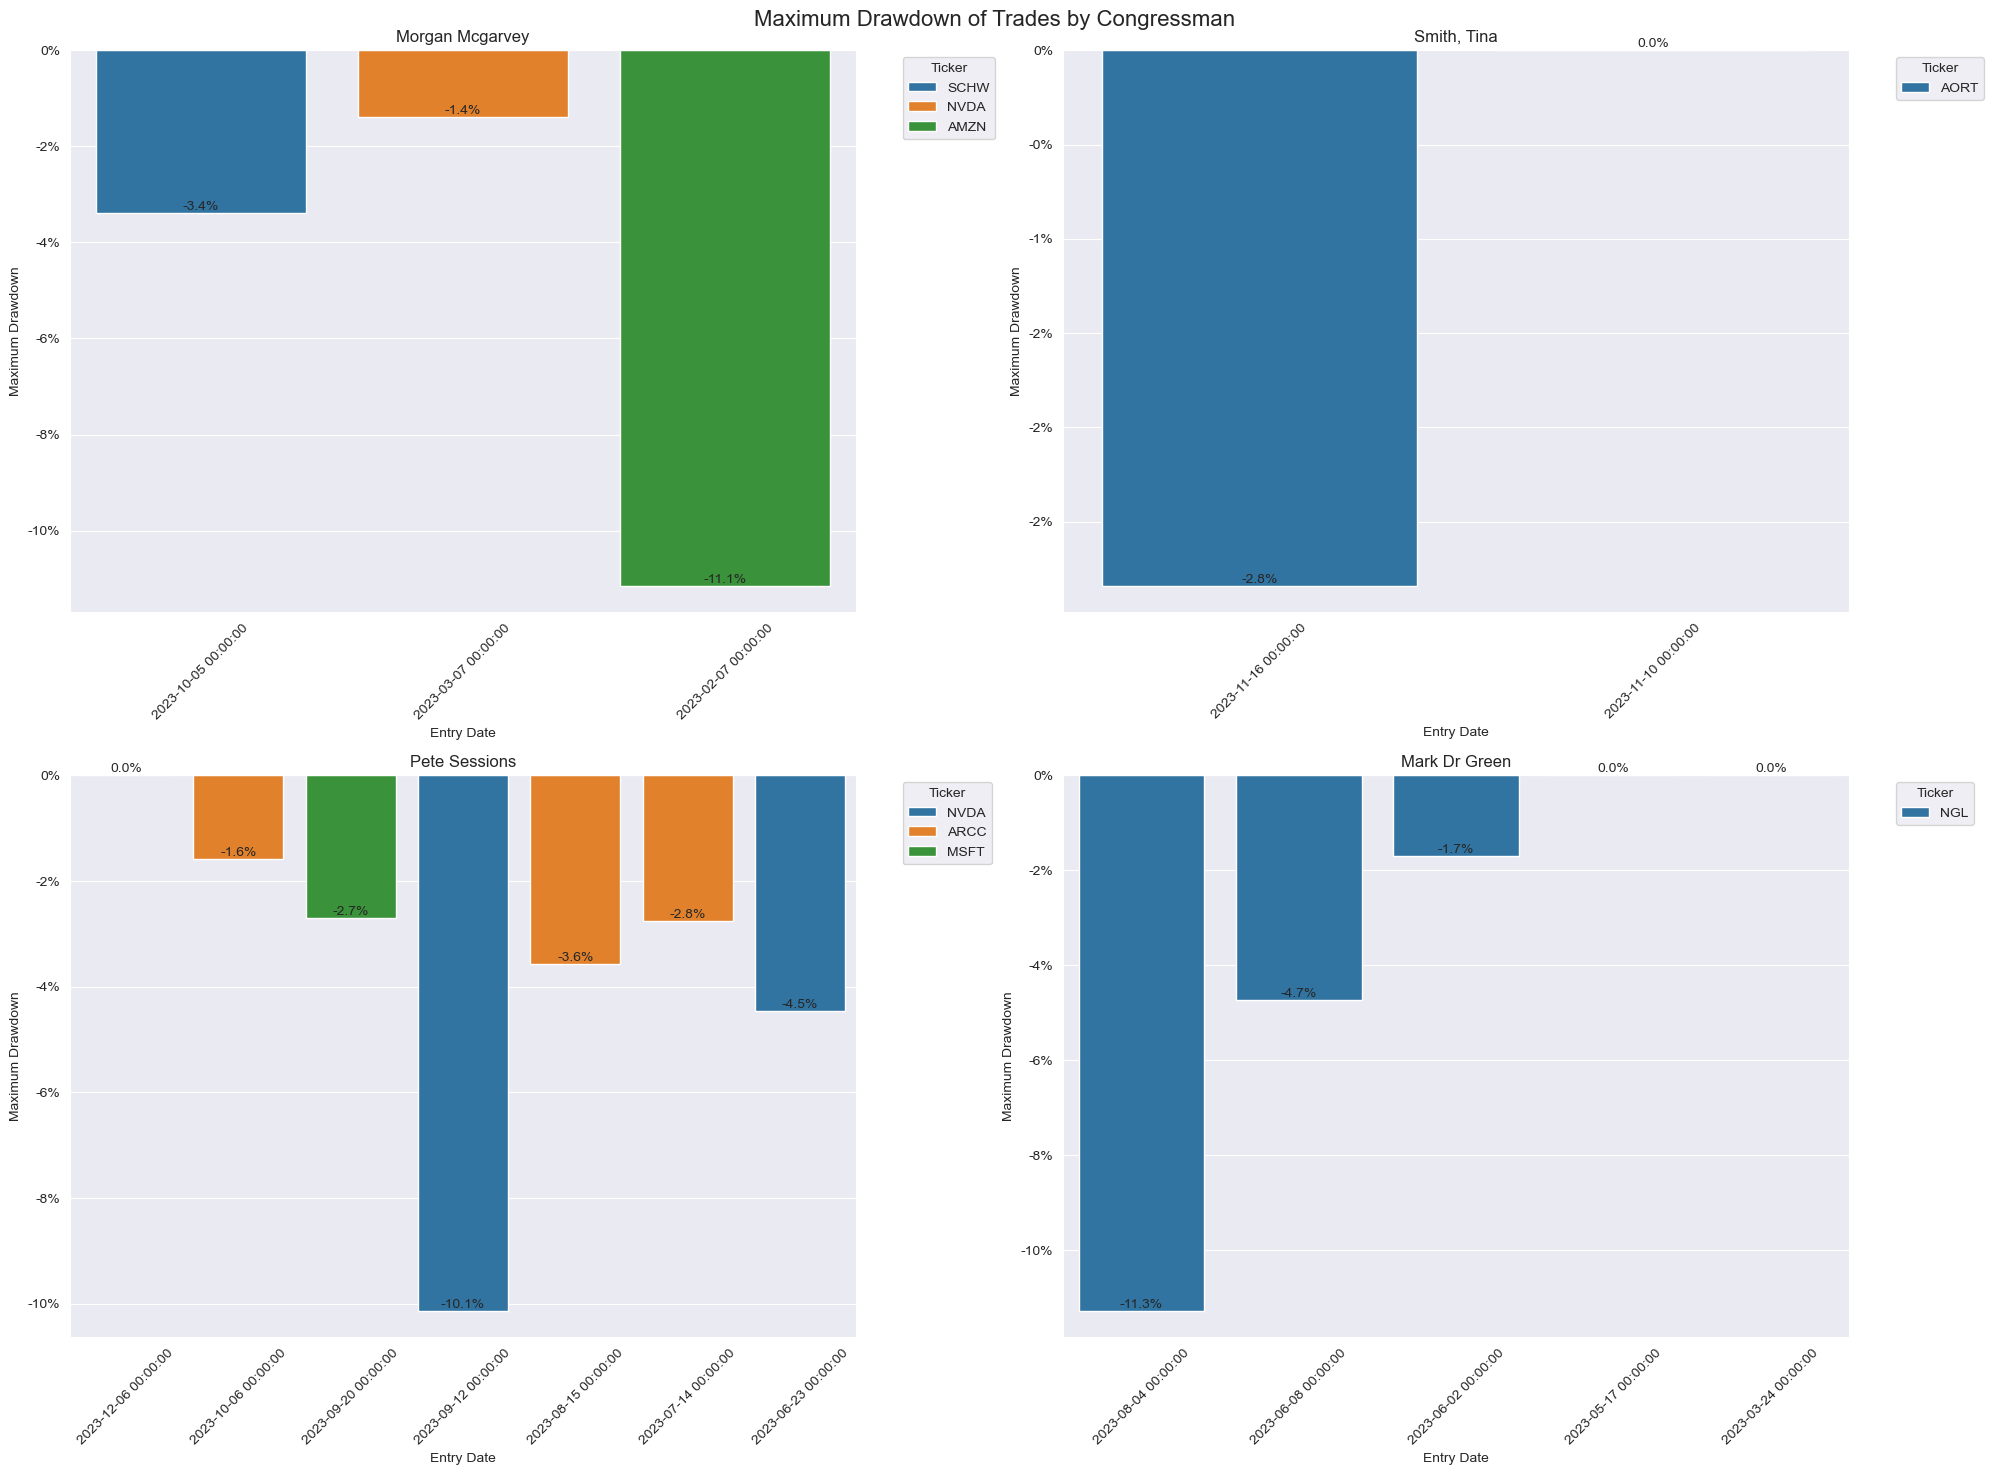

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have these dataframes:
# Just_stocks_purchases_2023VE
# Stock_prices_for_2023

# List of top congressmen
top_congressmen = ["Morgan Mcgarvey", "Smith, Tina", "Pete Sessions", "Mark Dr Green"]

def calculate_max_drawdown(entry_price, price_series):
    """Calculate the maximum drawdown from the entry price."""
    min_price = price_series.min()
    max_drawdown = (min_price - entry_price) / entry_price
    return max_drawdown

def analyze_congressman_trades(congressman):
    # Get trades for this congressman
    trades = Just_stocks_purchases_2023VE[Just_stocks_purchases_2023VE['Name'] == congressman]
    
    results = []
    
    for _, trade in trades.iterrows():
        ticker = trade['Ticker']
        entry_date = trade['Traded']
        
        # Get price data for this ticker after the entry date
        ticker_data = Stock_prices_for_2023[(Stock_prices_for_2023['Ticker'] == ticker) & 
                                            (Stock_prices_for_2023['Date'] >= entry_date)]
        ticker_data = ticker_data.sort_values('Date')
        
        if not ticker_data.empty:
            entry_price = ticker_data.iloc[0]['Close']
            max_drawdown = calculate_max_drawdown(entry_price, ticker_data['Close'])
            
            results.append({
                'Ticker': ticker,
                'Entry Date': entry_date,
                'Max Drawdown': max_drawdown
            })
    
    return pd.DataFrame(results)

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Maximum Drawdown of Trades by Congressman", fontsize=16)

# Analyze trades and plot results
for i, congressman in enumerate(top_congressmen):
    results = analyze_congressman_trades(congressman)
    
    row = i // 2
    col = i % 2
    
    # Create bar plot
    bars = sns.barplot(x='Entry Date', y='Max Drawdown', data=results, ax=axs[row, col], hue='Ticker', dodge=False)
    
    # Customize the subplot
    axs[row, col].set_title(congressman)
    axs[row, col].set_xlabel('Entry Date')
    axs[row, col].set_ylabel('Maximum Drawdown')
    axs[row, col].tick_params(axis='x', rotation=45)
    
    # Format y-axis as percentage
    axs[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    # Add value labels on the bars
    for bar in bars.patches:
        height = bar.get_height()
        axs[row, col].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom')

    # Adjust legend
    axs[row, col].legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Print detailed results
    print(f"\nMaximum Drawdown for {congressman}'s trades:")
    print(results.to_string(index=False))

plt.tight_layout()
plt.show()